Beta: [ 1.00565112 -0.62014609]
Beta Std Error: [0.01415654 0.20023405]
Beta Covariance: [[ 1.11962629e-06 -1.49473958e-05]
 [-1.49473958e-05  2.23993273e-04]]
Residual Variance: 178.99498737513136
Inverse Condition #: 0.15661414165298906
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


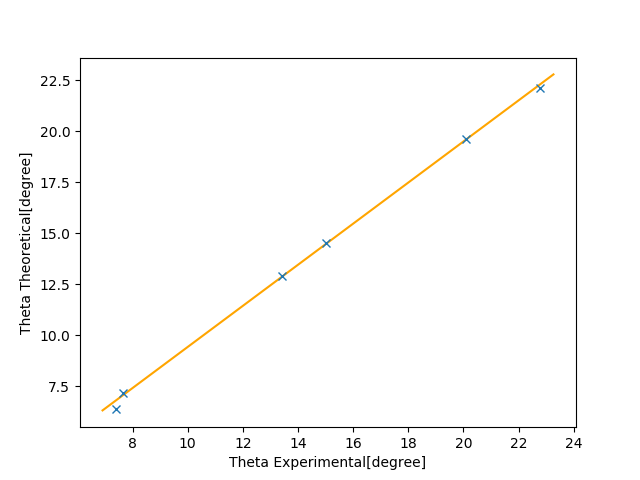

In [18]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.stats import linregress
from scipy.optimize import fsolve
import random



ex=[7.41047218,7.66174719,13.4154789,15.0341798 ,20.1043927,22.7669384]
exs=[0.0149985032,0.0000001,0.0000001,0.00240660654,0.005873,0.0297995619]
th=[6.41,7.2,12.9,14.5,19.6,22.1]
ths=[0.01,0.01,0.01,0.01,0.01,0.01]



def fit_func(p, x):
    m ,c= p
    return m*x+c

linear = Model(fit_func)

data = RealData(ex, th, sx=exs, sy=ths)

odr= ODR(data, linear, beta0=[0., -1.])

out = odr.run()

out.pprint()

x_fit = np.linspace(ex[0]-0.5, ex[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)

plt.errorbar(ex, th, xerr=exs, yerr=ths, linestyle='None', marker='x',ecolor='r')
plt.xlabel('Theta Experimental[degree]')
plt.ylabel('Theta Theoretical[degree]')
plt.plot(x_fit, y_fit,color='orange')

plt.savefig('yellow.jpg')

plt.show()




In [14]:
print(np.deg2rad(ex))

[0.12933714 0.13372271 0.23414428 0.26239594 0.35088785 0.39735804]
